# Feature Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Classic features

Classic features are used by the traditional readability formulas. They are usually very simple (for example, number of words in text).

In [2]:
import classic_features as cf

Read the train set and use functions from `classic_features.py` to create all classic features. 

Since creation of features takes some time, the first time all features are created, save it into a CSV file.

In [3]:
# UNCOMMENT to create all features
df = pd.read_csv("../data/weebit_train.csv", index_col = 0)
df['Text'] = df['Text'].astype(str)

df = cf.words_and_sentences(df)
df = cf.syllables(df)
df = cf.difficult_words_pct(df)
df = cf.polysyllables(df)
df = cf.complex_words_pct(df)
df = cf.long_sent_pct(df)
df = cf.long_word_pct(df)
df = cf.avg_letters_per_word(df)
df = cf.comma_pct(df)
#df.to_csv("weebit_train_with_features.csv", encoding='utf-8')
#df = pd.read_csv("weebit_train_with_features.csv", index_col=0)

### 1.1. Number of words

Print general statistics about number of words.

In [4]:
df["N_words"].describe()

count    2911.000000
mean      220.987290
std       194.145385
min         1.000000
25%       109.500000
50%       171.000000
75%       282.000000
max      2479.000000
Name: N_words, dtype: float64

Plot the distribution of number of words in texts.

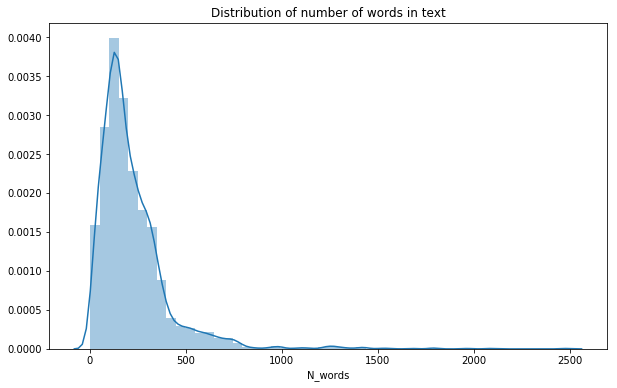

In [5]:
plt.figure(figsize=(10, 6))
sns.distplot(df["N_words"])
plt.title("Distribution of number of words in text")
plt.show()

Plot distribution of number of words per readability level.

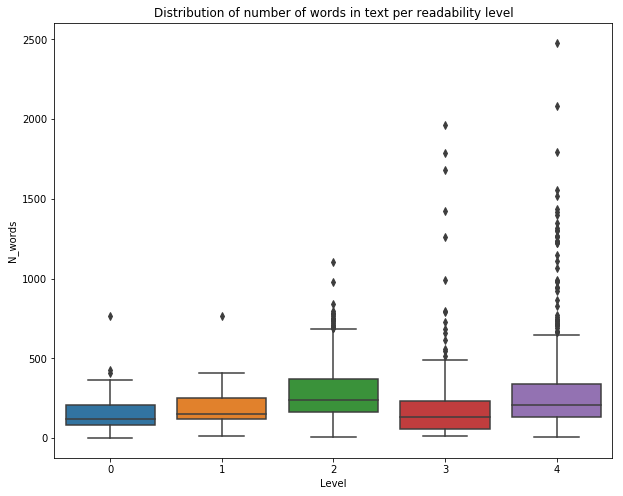

In [6]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="N_words", data=df)
plt.title("Distribution of number of words in text per readability level")
plt.show()

### 1.2. Number of sentences

Print general statistics about number of sentences.

In [7]:
df["N_sentences"].describe()

count    2911.000000
mean       20.212985
std        16.582916
min         1.000000
25%        11.000000
50%        16.000000
75%        25.500000
max       192.000000
Name: N_sentences, dtype: float64

Plot the distribution of number of words in texts.

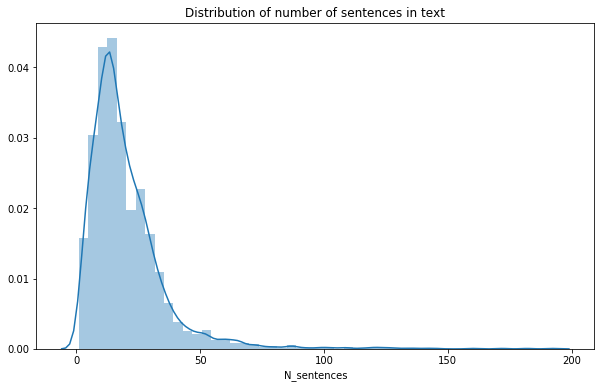

In [8]:
plt.figure(figsize=(10, 6))
sns.distplot(df["N_sentences"])
plt.title("Distribution of number of sentences in text")
plt.show()

Plot distribution of number of words per readability level.

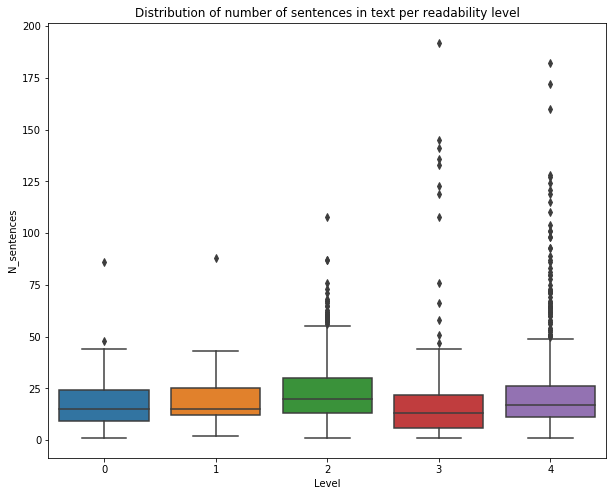

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="N_sentences", data=df)
plt.title("Distribution of number of sentences in text per readability level")
plt.show()

### 1.3. Average number of words per sentence

Let's try to analyse average number of words per sentence. This feature is used by almost all traditional formulas. It should correlate with readability level.

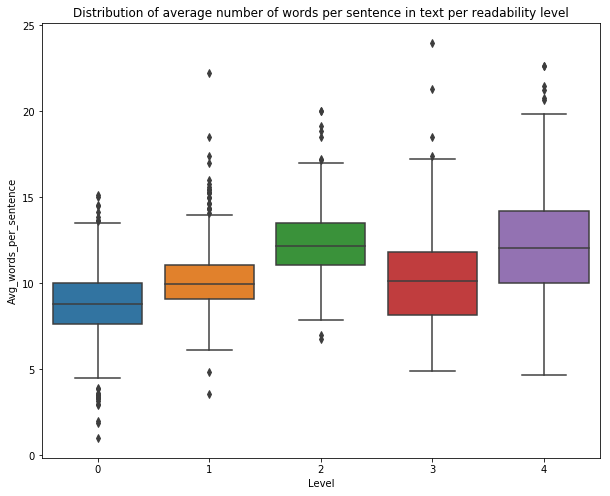

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Avg_words_per_sentence", data=df)
plt.title("Distribution of average number of words per sentence in text per readability level")
plt.show()

There does seem to be a trend of more difficult levels having more words per sentence.

### 1.3. Average number of syllables per word

Let's try to analyse average number of syllables per word. It should correlate with readability level.

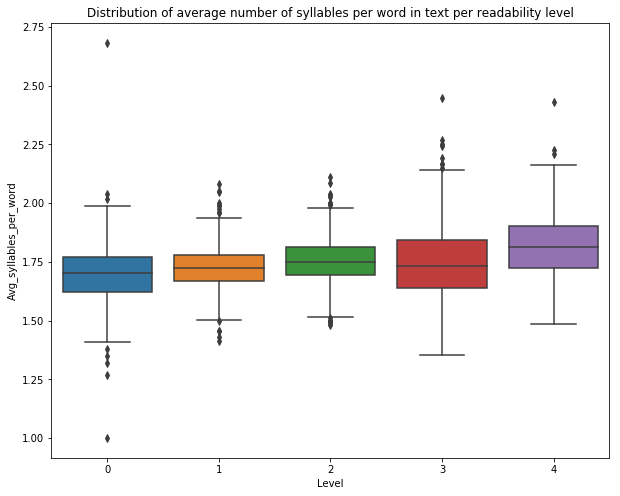

In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Avg_syllables_per_word", data=df)
plt.title("Distribution of average number of syllables per word in text per readability level")
plt.show()

There is a slight trend of more difficult levels having a larger number of syllables.

### 1.4. Percentage of difficult and complex words

Difficult words are words not present in the Dale-Chall simple word list.
Complex words are polysyllables (words with more than 2 syllables).

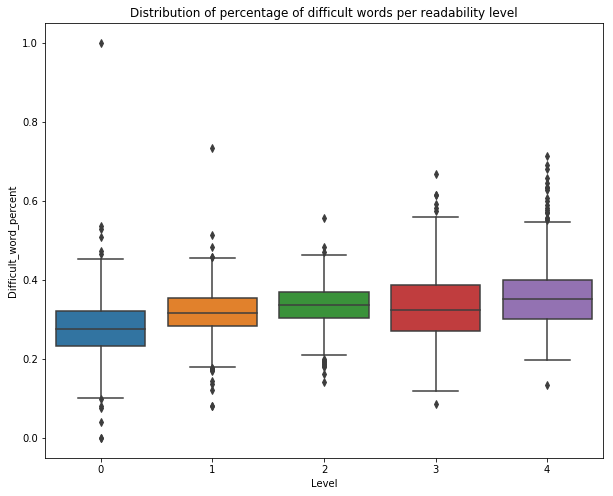

In [14]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Difficult_word_percent", data=df)
plt.title("Distribution of percentage of difficult words per readability level")
plt.show()

There seems to be a trend of more difficult readability levels having a higher percentage of difficult words.

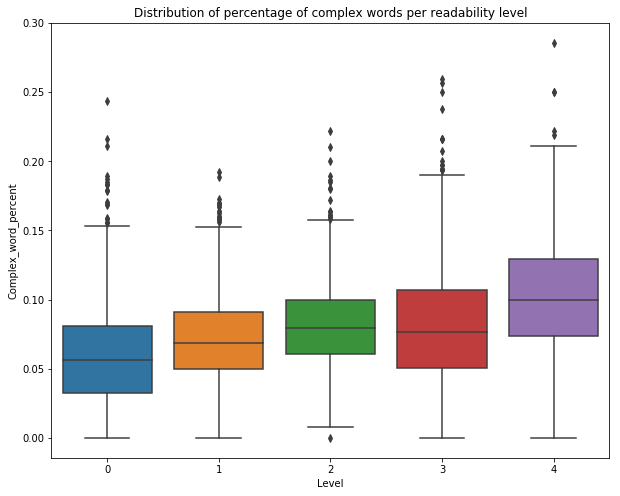

In [15]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Complex_word_percent", data=df)
plt.title("Distribution of percentage of complex words per readability level")
plt.show()

There seems to be a trend of more difficult readability levels having a higher percentage of complex words (polysyllables).

### 1.5. Percentage of long sentences and words

A sentence is long if it has more than 25 words.

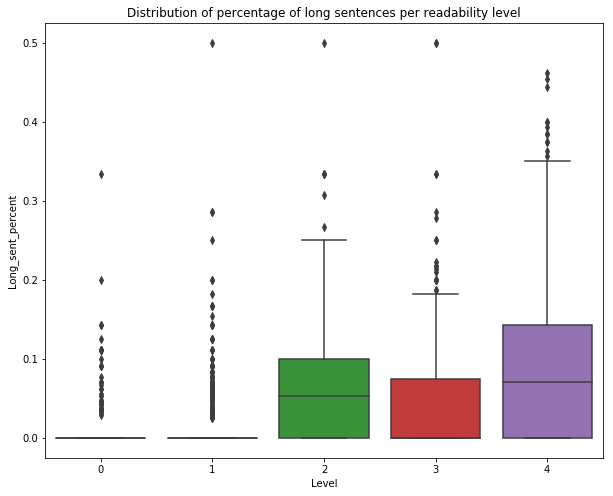

In [4]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Long_sent_percent", data=df)
plt.title("Distribution of percentage of long sentences per readability level")
plt.show()

There is a trend of more complex texts having more long sentences.

A word is long if it has more than 8 characters.

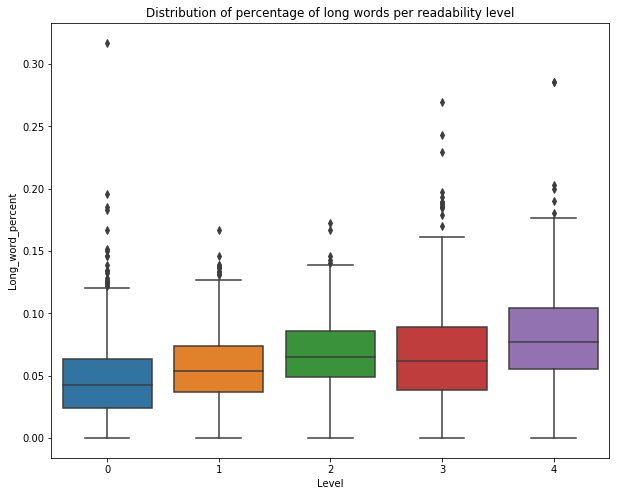

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Long_word_percent", data=df)
plt.title("Distribution of percentage of long words per readability level")
plt.show()

There is a trend of more complex texts having more long words.

### 1.6. Percentage of sentences with a comma

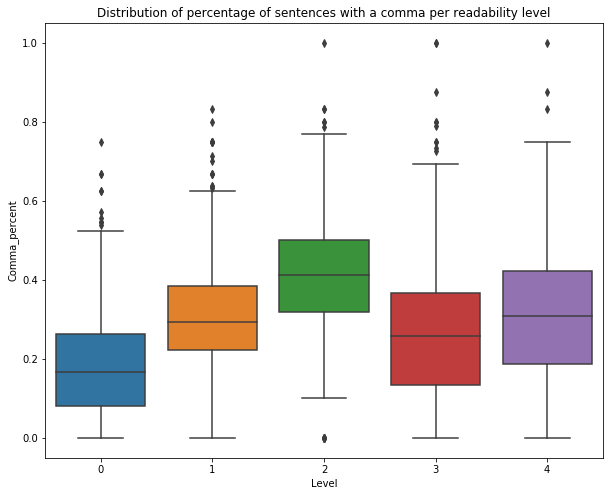

In [5]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Comma_percent", data=df)
plt.title("Distribution of percentage of sentences with a comma per readability level")
plt.show()

__We see a worrying trend here.__ Our dataset is made out two datasets, Weekly Reader and BBC BiteSize. Levels 0 to 2 are from Weekly Reader, while level 3 and 4 are from BiteSize. While we can see a trend of higher levels having more sentences with commas, we can also see the divide in our dataset.

### 1.7. Average number of letters per word

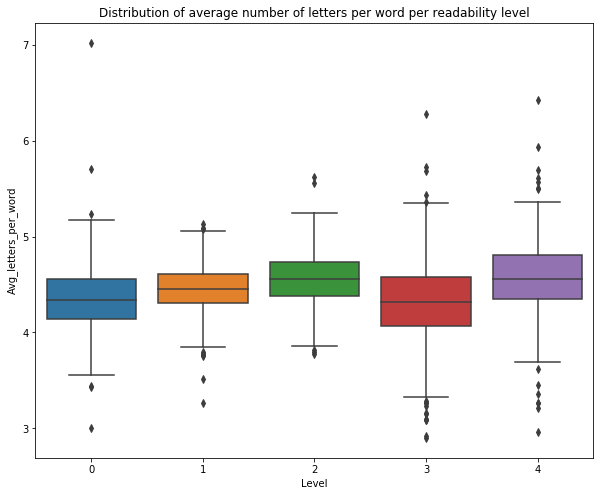

In [23]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Level", y="Avg_letters_per_word", data=df)
plt.title("Distribution of average number of letters per word per readability level")
plt.show()

This feature __does not__ seem to correlate with readability level.

## 2. Non-classic features

In [6]:
df.columns.values

array(['Text', 'Level', 'Tokens', 'Words', 'Sentences', 'N_words',
       'N_sentences', 'N_syllables', 'Difficult_word_percent',
       'N_polysyllables', 'Complex_word_percent',
       'Avg_words_per_sentence', 'Avg_syllables_per_word'], dtype=object)

In [13]:
for token in df['Tokens'][0]:
    print(token.pos)

AttributeError: 'str' object has no attribute 'pos'

In [7]:
len("Lol")

3